***"Pollution Pulse: Mapping India’s Air Quality Snapshot"***


In [35]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df= pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\AIR_QUALITY\dataset\air_quality.csv")
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",04-04-2025 14:00:00,16.486692,80.699436,OZONE,20.0,32.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,SO2,10.0,13.0,11.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,CO,30.0,41.0,32.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",04-04-2025 14:00:00,16.554731,80.649110,NO2,14.0,18.0,15.0
4,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-04-2025 14:00:00,17.720000,83.300000,NO2,28.0,68.0,43.0


In [4]:
#basic inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3229 non-null   object 
 1   state          3229 non-null   object 
 2   city           3229 non-null   object 
 3   station        3229 non-null   object 
 4   last_update    3229 non-null   object 
 5   latitude       3229 non-null   float64
 6   longitude      3229 non-null   float64
 7   pollutant_id   3229 non-null   object 
 8   pollutant_min  3026 non-null   float64
 9   pollutant_max  3026 non-null   float64
 10  pollutant_avg  3026 non-null   float64
dtypes: float64(5), object(6)
memory usage: 277.6+ KB


In [5]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3229.000000,3229.000000,3026.000000,3026.000000,3026.00000
mean,22.154725,78.746203,22.024124,84.134171,47.08427
std,5.595920,4.945867,24.072022,93.823734,50.30609
min,8.514909,70.909168,1.000000,1.000000,1.00000
25%,18.910000,75.565602,5.000000,19.000000,12.00000
50%,23.016834,77.494094,14.000000,54.500000,31.00000
75%,26.786682,80.699436,31.000000,108.000000,62.00000
max,34.066206,94.636574,326.000000,500.000000,396.00000


In [6]:
df.isnull().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    203
pollutant_max    203
pollutant_avg    203
dtype: int64

In [7]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [ ]:
# Replace NA with NaN and convert to numeric
df[['pollutant_min', 'pollutant_max', 'pollutant_avg']] = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']].replace('NA', pd.NA)
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#drop rows with all  three pollutant values as NaN
df = df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'], how='all')

In [9]:
#Check duplicates
duplicates= df.duplicated(subset=['station','pollutant_id','last_update'])
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 0


In [10]:
#Outlier check
pm25_avrage =df[df['pollutant_id']=='PM2.5']['pollutant_avg']
mean, std = pm25_avrage.mean() , pm25_avrage.std()
outliers= pm25_avrage[(pm25_avrage > mean + 3*std) | (pm25_avrage <mean - 3*std)]
print(f"Potential PM2.5 outliers: {outliers}")

Potential PM2.5 outliers: 6       316.0
533     351.0
1193    396.0
1418    299.0
1642    326.0
Name: pollutant_avg, dtype: float64


In [43]:
#checking for invalid geographic data
#geospatial validation
validlatitute =df['latitude'].between(8,37)  #India's latitude range
validlong= df['longitude'].between(68,97) # India's longitude range
print(f"Invalid coordinates: {((~validlatitute) | (~validlong)).sum()}")

Invalid coordinates: 0


In [12]:
#save the cleaned data to a new csv file
df.to_csv('../dataset/air_quality_cleaned.csv', index=False)
print("Cleaned data is  saved!")

Cleaned data is  saved!


***EDA and Basic Visualizations***

In [13]:
df = pd.read_csv('../dataset/air_quality_cleaned.csv')
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Kanuru, Vijayawada - APPCB",04-04-2025 14:00:00,16.486692,80.699436,OZONE,20.0,32.0,21.0
1,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,SO2,10.0,13.0,11.0
2,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",04-04-2025 14:00:00,16.509717,80.612222,CO,30.0,41.0,32.0
3,India,Andhra_Pradesh,Vijayawada,"Rajiv Nagar, Vijayawada - APPCB",04-04-2025 14:00:00,16.554731,80.649110,NO2,14.0,18.0,15.0
4,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",04-04-2025 14:00:00,17.720000,83.300000,NO2,28.0,68.0,43.0


In [45]:
#Summarize  pollutant distribution
pollutant_summary = df.groupby('pollutant_id')[['pollutant_avg']].agg(['mean', 'min','max','count'])
print("Pollutant summary statistics\n")
pollutant_summary


Pollutant summary statistics



pollutant_avg                  
                      mean  min    max count
pollutant_id                                
CO               36.848812  2.0  129.0   463
NH3               5.673469  1.0   23.0   392
NO2              32.687927  1.0  179.0   439
OZONE            47.623608  1.0  304.0   449
PM10            101.459207  2.0  360.0   429
PM2.5            83.877315  6.0  396.0   432
SO2              18.241706  1.0  107.0   422

***#Univariate Analysis: Looking at one pollutant at a time(here we have PM2.5)***

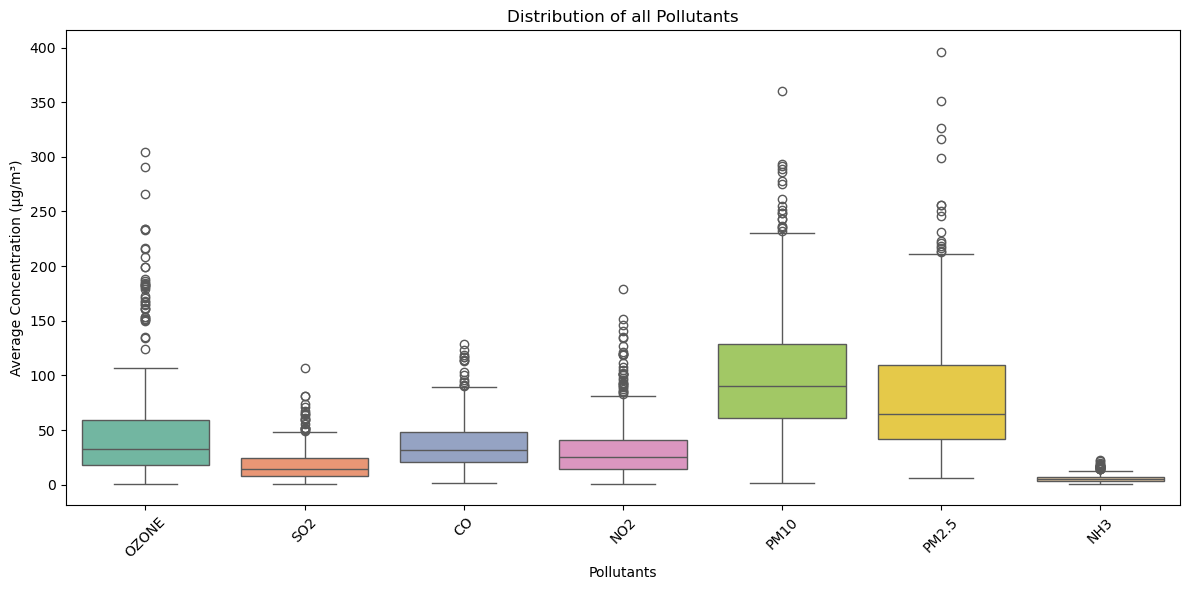

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pollutant_id', y='pollutant_avg',hue='pollutant_id', data=df, palette='Set2', legend=False)
plt.title('Distribution of all Pollutants')
plt.xlabel('Pollutants')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/all_pollutants_boxplot.png')
plt.show()

In [47]:
#Top and bottom PM2.5 cities
pm25_avg = df[df['pollutant_id'] == 'PM2.5'].groupby('city')['pollutant_avg'].mean().sort_values()
print("Lowest PM2.5 cities:\n", pm25_avg.head(5))
print("Highest PM2.5 cities:\n", pm25_avg.tail(5))

Lowest PM2.5 cities:
 city
Gadag             8.0
Tirupur          13.0
Palkalaiperur    14.0
Madikeri         15.0
Agartala         16.0
Name: pollutant_avg, dtype: float64
Highest PM2.5 cities:
 city
Hajipur          192.0
Greater Noida    201.0
Ghaziabad        241.5
Siliguri         256.0
Byrnihat         316.0
Name: pollutant_avg, dtype: float64


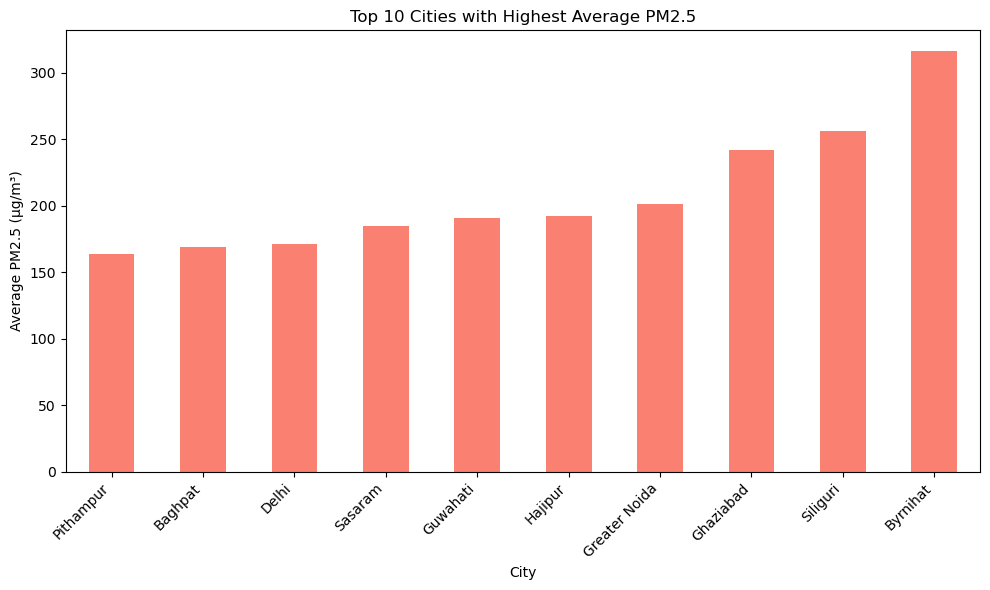

In [48]:
#Top 10 PM2.5 cities
plt.figure(figsize=(10,6))
pm25_avg.tail(10).plot(kind='bar',color='salmon')
plt.title('Top 10 Cities with Highest Average PM2.5')
plt.xlabel('City')
plt.ylabel('Average PM2.5 (μg/m³)')
plt.xticks(rotation=45 , ha='right')
plt.tight_layout()
plt.savefig('../outputs/pm25_top10.png')
plt.show()


In [51]:
#North vs. South comparison
north = ['Delhi', 'Uttar_Pradesh', 'Bihar', 'Haryana']
south = ['Karnataka', 'TamilNadu', 'Kerala', 'Andhra_Pradesh']
df['region']= df['state'].apply(lambda x: 'North' if x in north else ('South' if x in south else 'Other'))
pm25_region = df[df['pollutant_id']== 'PM2.5'].groupby('region')['pollutant_avg'].mean()
print("PM2.5 by region:\n", pm25_region)

PM2.5 by region:
 region
North    124.594828
Other     78.089431
South     36.742857
Name: pollutant_avg, dtype: float64


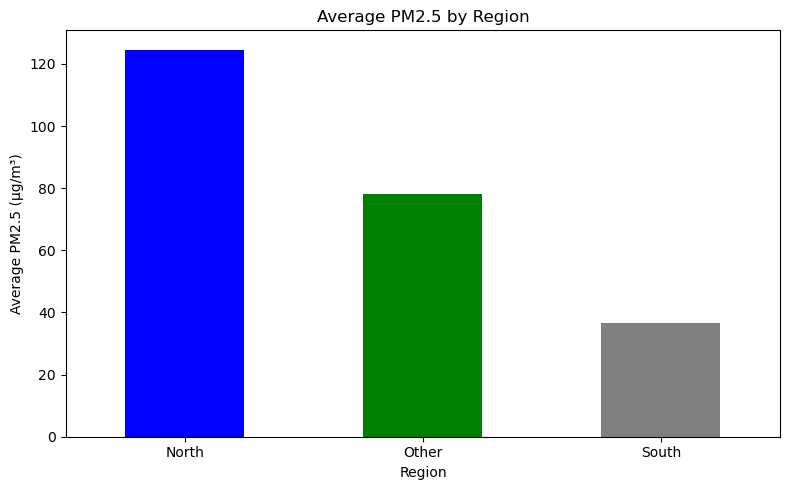

In [52]:
#regional PM2.5 comparison
plt.figure(figsize=(8,5))
pm25_region.plot(kind='bar', color=['blue','green', 'gray'])
plt.title('Average PM2.5 by Region')
plt.xlabel('Region')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../outputs/pm25_region.png')
plt.show()


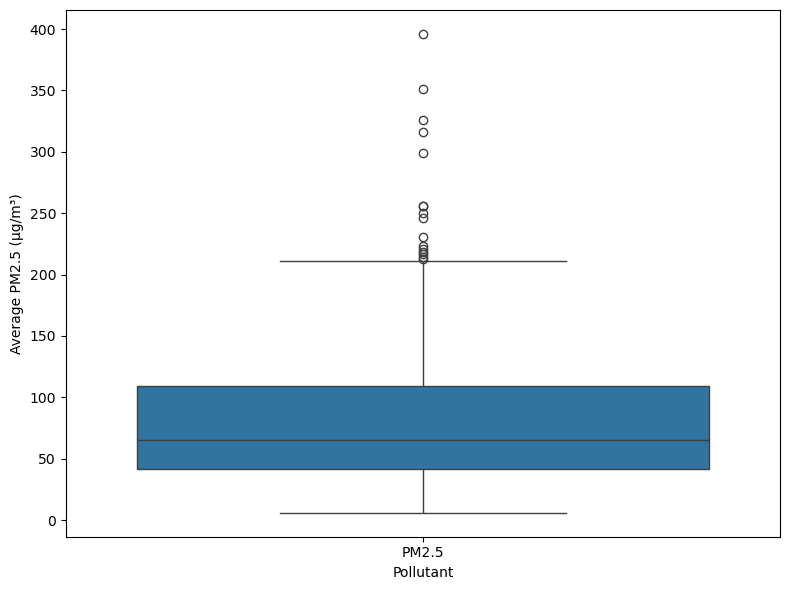

In [20]:
#PM2.5 variability across stations
plt.figure(figsize=(8,6))
sns.boxplot(x='pollutant_id', y='pollutant_avg',data= df[df['pollutant_id']=='PM2.5'])
plt.xlabel('Pollutant')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.tight_layout()
plt.savefig('../outputs/pm25_boxplot.png')
plt.show()

***Advanced Analysis and Mapping***

In [21]:
import folium


In [53]:
north =['Delhi', 'Uttar_Pradesh', 'Bihar', 'Haryana']
south= ['Karnataka', 'TamilNadu', 'Kerala', 'Andhra_Pradesh']
df['region'] = df['state'].apply(lambda x: 'North' if x in north else ('South' if x in south else 'Other'))
pm25_region_stats = df[df['pollutant_id'] == 'PM2.5'].groupby('region')['pollutant_avg'].agg(['mean', 'std', 'count'])
print("PM2.5 regional stats:\n", pm25_region_stats)

PM2.5 regional stats:
               mean        std  count
region                              
North   124.594828  70.933402    116
Other    78.089431  47.173584    246
South    36.742857  15.631338     70


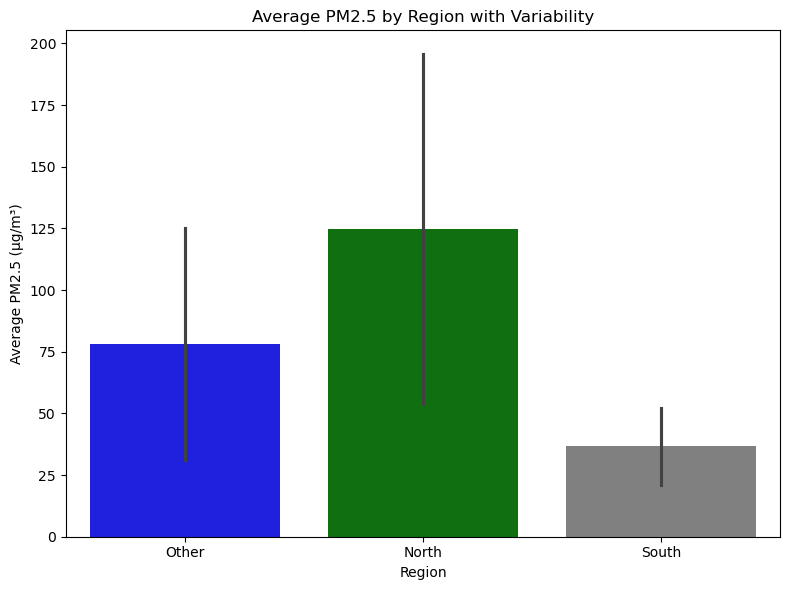

In [54]:
#regional comparison with error bars
plt.figure(figsize=(8,6))
sns.barplot(x='region', y='pollutant_avg', hue='region',data= df[df['pollutant_id']=='PM2.5'], errorbar='sd' , palette =['blue','green', 'gray'], legend = False)
plt.title('Average PM2.5 by Region with Variability')
plt.xlabel('Region')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.tight_layout()
plt.savefig('../outputs/pm25_region_advanced.png')
plt.show()

***# Bivariate Analysis: Checking relationships between two pollutants(here we have PM2.5 VS. PM10)***

In [57]:
#Pollutant correlations
pivotdf = df.pivot_table(index=['state', 'city', 'station'], columns='pollutant_id', values='pollutant_avg', aggfunc='mean')
corr = pivotdf.corr()
print("Correlation Matrix:\n")
corr

Correlation Matrix:



pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
pollutant_id,,,,,,,
CO,1.000000,0.181404,0.322392,0.228882,0.368975,0.359484,0.173377
NH3,0.181404,1.000000,0.440349,0.234742,0.451521,0.360316,0.048185
NO2,0.322392,0.440349,1.000000,0.346007,0.551801,0.450785,0.149263
OZONE,0.228882,0.234742,0.346007,1.000000,0.395384,0.273981,0.046435
PM10,0.368975,0.451521,0.551801,0.395384,1.000000,0.844276,0.216401
PM2.5,0.359484,0.360316,0.450785,0.273981,0.844276,1.000000,0.238412
SO2,0.173377,0.048185,0.149263,0.046435,0.216401,0.238412,1.000000


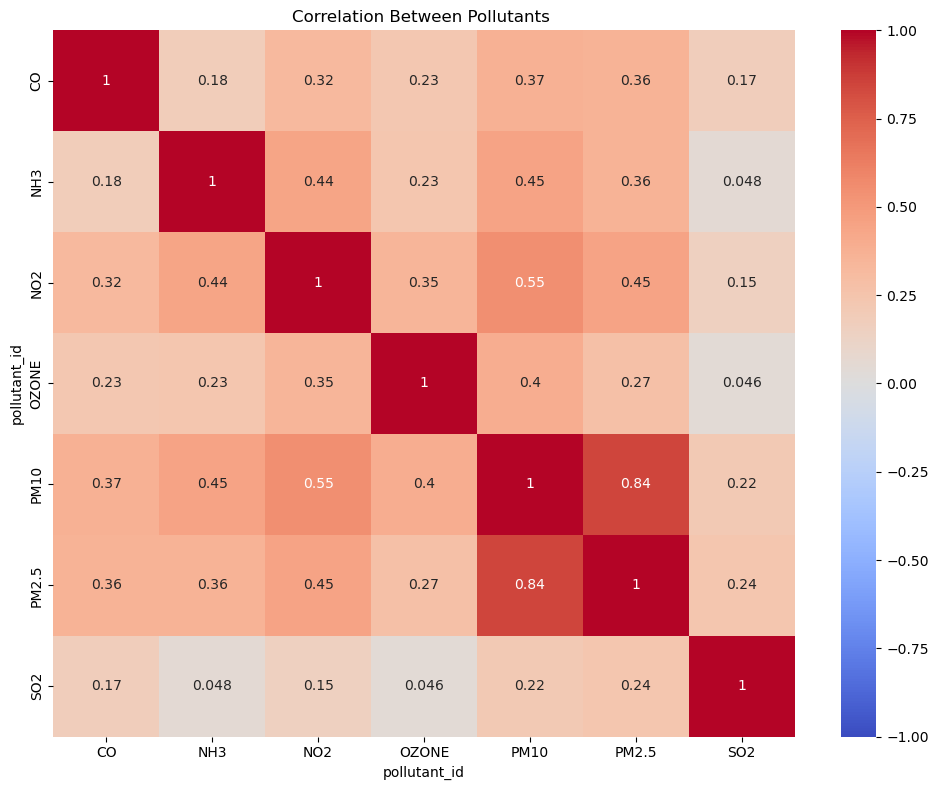

In [58]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Pollutants ')
plt.tight_layout()
plt.savefig('../outputs/corr_heatmap.png')
plt.show()

In [59]:
#Mapping PM2.5 hotspots
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)  # Center of India
pm25_data = df[df['pollutant_id'] == 'PM2.5'].dropna(subset=['latitude', 'longitude'])
for _, row in pm25_data.iterrows():
    color = 'red' if row['pollutant_avg'] > 100 else 'yellow' if row['pollutant_avg'] > 50 else 'green'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['city']}, {row['state']}: {row['pollutant_avg']} µg/m³"
    ).add_to(m)
m.save('../outputs/air_quality_map.html')
print("Map saved as 'air_quality_map.html' in outputs  folder")

Map saved as 'air_quality_map.html' in outputs  folder


In [27]:
from sklearn.preprocessing import MinMaxScaler


***Multivariate Analysis: Analyzing multiple variables together(here we have PM2.5, PM10, NO2..)***

In [60]:
#Simplified AQI score
key_pollutants = ['PM2.5', 'PM10', 'NO2']
aqi_df = df[df['pollutant_id'].isin(key_pollutants)].pivot_table(index='city', columns='pollutant_id', values='pollutant_avg', aggfunc='mean')
#simple fill method "My approach i chose means over interpolation for simplicity"
aqi_df = aqi_df.fillna(aqi_df.mean())  
scaler = MinMaxScaler()
aqi_scaled = scaler.fit_transform(aqi_df)
#Feature engineering
aqi_df['AQI_Score'] = aqi_scaled.mean(axis=1) * 100  
print("Top 5 Cities by AQI Score:\n", aqi_df.sort_values('AQI_Score', ascending=False).head())

Top 5 Cities by AQI Score:
 pollutant_id          NO2        PM10       PM2.5  AQI_Score
city                                                        
Ghaziabad      105.750000  205.500000  241.500000  83.355765
Greater Noida  108.000000  197.500000  201.000000  78.376833
Byrnihat        15.000000  225.000000  316.000000  70.133333
Delhi           81.631579  210.710526  171.297297  70.105343
Siliguri        24.000000  212.000000  256.000000  64.096628


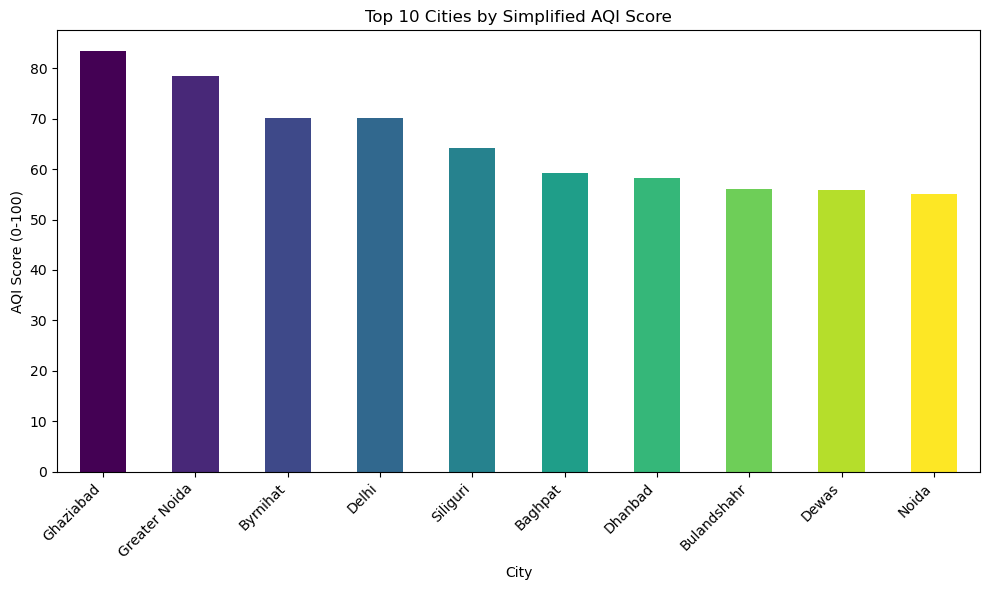

In [36]:
#Top 10 AQI cities
plt.figure(figsize=(10, 6))
aqi_df['AQI_Score'].sort_values(ascending=False).head(10).plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Top 10 Cities by Simplified AQI Score')
plt.xlabel('City')
plt.ylabel('AQI Score (0-100)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../outputs/aqi_top10.png')
plt.show()

In [61]:
#Infer location types from station names
df['location_type'] = df['station'].apply(
    lambda x: 'Industrial' if 'Zone' in str(x) or 'Plant' in str(x) 
    else 'Urban' if 'Nagar' in str(x) or 'Colony' in str(x) 
    else 'Other'
)
pm25_by_type = df[df['pollutant_id'] == 'PM2.5'].groupby('location_type')['pollutant_avg'].agg(['mean', 'count'])
print("PM2.5 by location type:\n", pm25_by_type)

PM2.5 by location type:
                     mean  count
location_type                  
Industrial     37.000000      1
Other          85.137026    343
Urban          79.500000     88


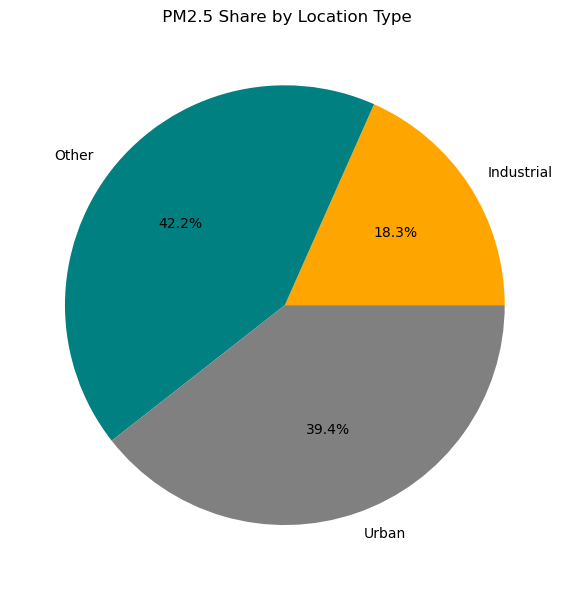

In [ ]:
#PM2.5 by location type

pm25_by_type = df[df['pollutant_id'] == 'PM2.5'].groupby('location_type')['pollutant_avg'].mean()
plt.figure(figsize=(8, 6))
plt.pie(pm25_by_type, labels=pm25_by_type.index, colors=['orange', 'teal', 'gray'], autopct='%1.1f%%')
plt.title(' PM2.5 Share by Location Type')
plt.tight_layout()
plt.savefig('../outputs/pm25_by_location.png')
plt.show()